# Part II - (Explanatory Data Visualizations )
## by (Nourhene aouidi)





## Investigation Overview


> In this investigation I'm  looking into the factors that contribute  to flight delays and cancellation. 



## Dataset Overview

> The dataset is from Data Expo 2009. It comprises of flight operation details i.e Arrival and Departure of all flight within USA, starting from October 1987 to April 2008. website.In this analysis i just used 2008 dataset due to how big the dataset is also i didn't use the month factor  in my analysis because the dataset is limited i can just acces to the first four months .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2008.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1) :  the average departure delay for each carrier, ordered by highest to lowest delay and the total number of flights

> The number of flights operated by an airline is not always a reliable predictor of its departure delay rate. For example, Southwest is the busiest air carrier in the US, while United Airlines is only the eighth busiest. However, United has the highest average departure delay among major US airlines. This shows that other factors, such as scheduling, maintenance, and weather conditions, may have a greater impact on a carrier's departure performance.
To illustrate this point, we can compare two different arrangements of the data. On the left, we see a plot of the carriers ranked by their average departure delay, regardless of their flight volume. This highlights the airlines that have the most significant delays, which may be of interest to passengers who prioritize punctuality over other factors. On the right, we have a plot of the same carriers, but this time ordered by their total number of flights. This shows the airlines that are busiest, which could be useful for those who prioritize availability and frequency of flights. By comparing these two arrangements, we can better understand the relationship between flight volume and departure delay, and make more informed choices when selecting an airline."
 

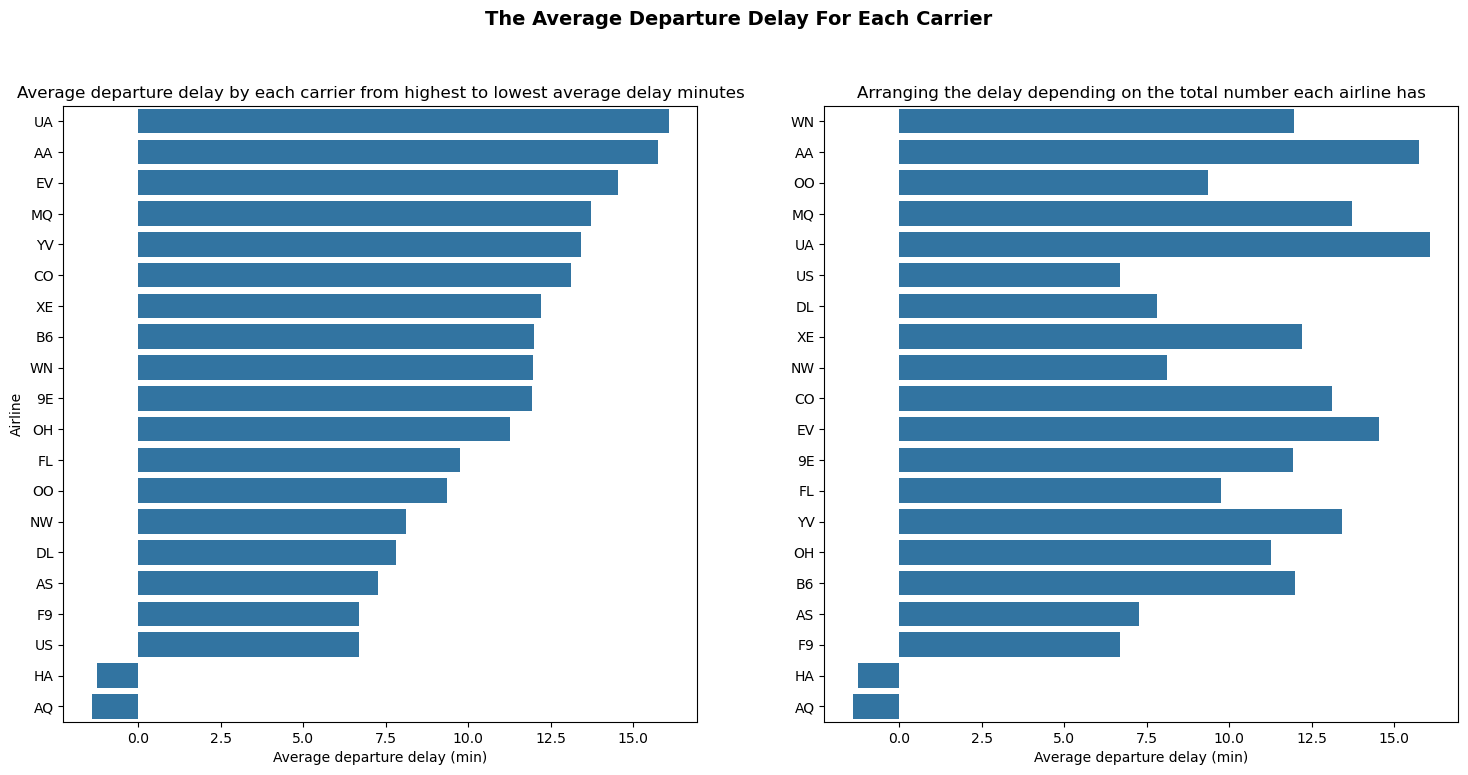

In [3]:
# Calculate the mean departure delay for each carrier
carrier_delay = df.groupby(['UniqueCarrier'])['DepDelay'].mean().reset_index()

# Sort the carriers by their average departure delay
get_order = carrier_delay.sort_values(by='DepDelay', ascending=False)['UniqueCarrier'].tolist()

# Plot the average departure delay for each carrier, ordered by highest to lowest delay
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sb.barplot(data=carrier_delay, y='UniqueCarrier', x='DepDelay', order=get_order, color=sb.color_palette()[0])
plt.title('Average departure delay by each carrier from highest to lowest average delay minutes')
plt.ylabel('Airline')
plt.xlabel('Average departure delay (min)')

# Plot the average departure delay for each carrier, ordered by the total number of flights
plt.subplot(1, 2, 2)
carrier_order = df['UniqueCarrier'].value_counts().index.tolist()
sb.barplot(data=carrier_delay, y='UniqueCarrier', x='DepDelay', order=carrier_order, color=sb.color_palette()[0])
plt.title('Arranging the delay depending on the total number each airline has')
plt.ylabel('')
plt.xlabel('Average departure delay (min)')
plt.suptitle("the average departure delay for each carrier".title(), y = 1, fontsize = 14, weight = "bold");



## (Visualization 2) :  comparing the percentage of cancelled flights across different airlines

> By comparing the percentage of cancelled flights across different airlines, we can gain valuable insights into their performance. In the bar chart on the left, we see the percentage of cancelled flights for each airline arranged from highest to lowest. Interestingly, airlines such as American Eagle and United, which have a high percentage of cancelled flights, are also among the airlines with the most delayed flights, as we saw in our previous analysis. On the other hand, Southwest, which is the busiest airline, has a low percentage of cancelled flights. This may be one reason for the success of Southwest, as customers may be more likely to choose an airline that has a good track record of keeping their flights on schedule. In the bar chart on the right, we see the same data arranged by the total number of flights for each airline. This allows us to compare the performance of airlines with similar flight volumes, and we can see that the airlines with the lowest percentage of cancelled flights are not necessarily the busiest airlines.

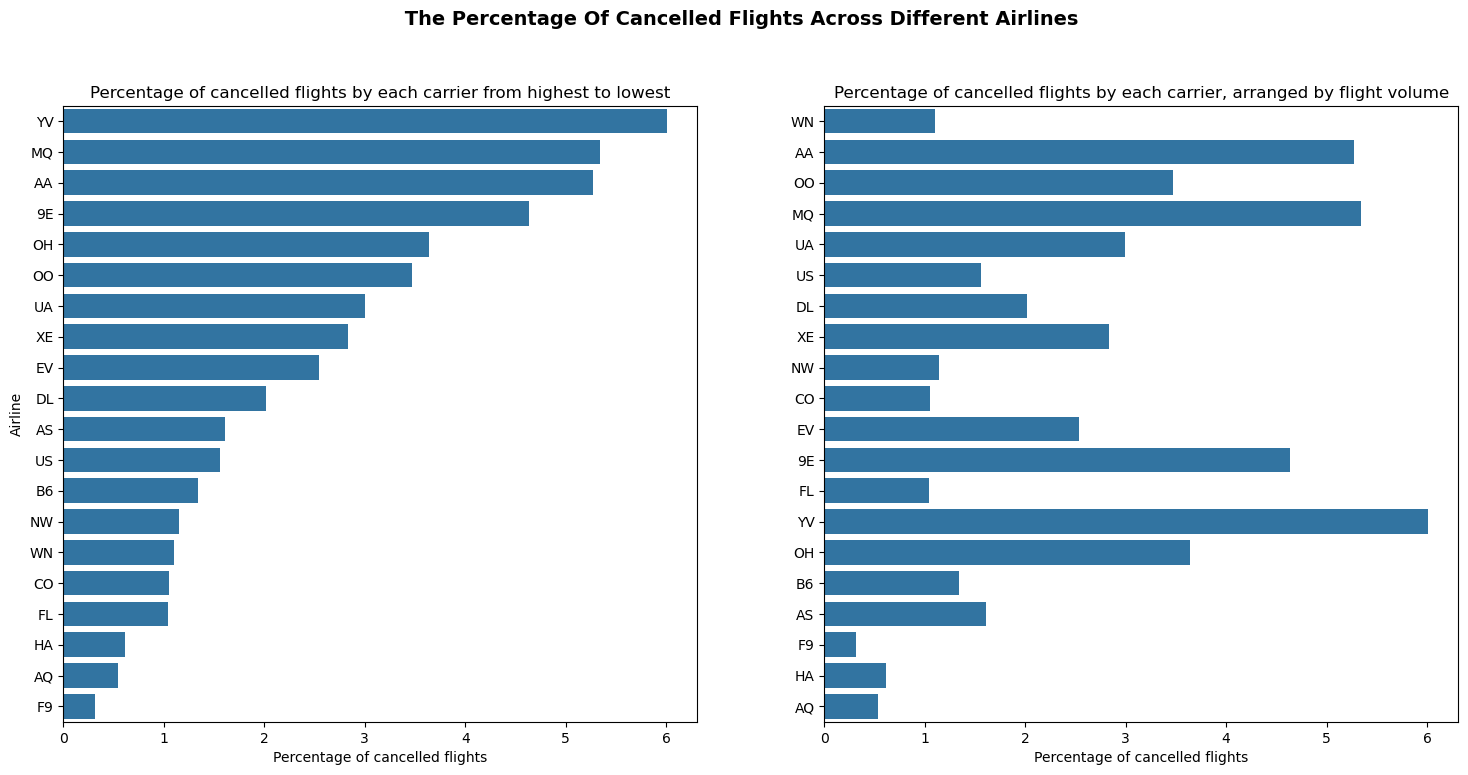

In [4]:
# Calculate the percentage of cancelled flights for each carrier
cancelled_pct = df.groupby('UniqueCarrier')['Cancelled'].mean() * 100

# Create a dataframe from the cancelled_pct series
cancelled = pd.DataFrame({'UniqueCarrier': cancelled_pct.index, 'Cancelled': cancelled_pct.values})

# Sort the carriers by their percentage of cancelled flights, from highest to lowest
get_order = cancelled.sort_values(by='Cancelled', ascending=False)['UniqueCarrier'].tolist()

# Plot the percentage of cancelled flights for each carrier, ordered by highest to lowest percentage
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sb.barplot(data=cancelled, y='UniqueCarrier', x='Cancelled', order=get_order, color=sb.color_palette()[0])
plt.title('Percentage of cancelled flights by each carrier from highest to lowest')
plt.ylabel('Airline')
plt.xlabel('Percentage of cancelled flights')

# Plot the percentage of cancelled flights for each carrier, ordered by the total number of flights
plt.subplot(1, 2, 2)
carrier_order = df['UniqueCarrier'].value_counts().index.tolist()
sb.barplot(data=cancelled, y='UniqueCarrier', x='Cancelled', order=carrier_order, color=sb.color_palette()[0])
plt.title('Percentage of cancelled flights by each carrier, arranged by flight volume')
plt.ylabel('')
plt.xlabel('Percentage of cancelled flights')
plt.suptitle(" the percentage of cancelled flights across different airlines".title(), y = 1, fontsize = 14, weight = "bold");


## (Visualization 3) : Complaring Weather Delay and Carrier Delay in Different Airports
>Although weather delay is partly linked to the airport's location, it does not fully account for why some carriers experience higher average delays at certain airports compared to other carriers. For example, two carriers - EV and OH - have notably higher average weather delay times than other carriers, with OH experiencing weather-related delays at most airports. In contrast, EV has higher weather delay times mainly at Atlanta, where it operates more flights than at other airports. This suggests that the cause of EV's weather delay is more likely to be related to the airport's location, whereas OH's weather delay cannot be solely attributed to the airport's location.


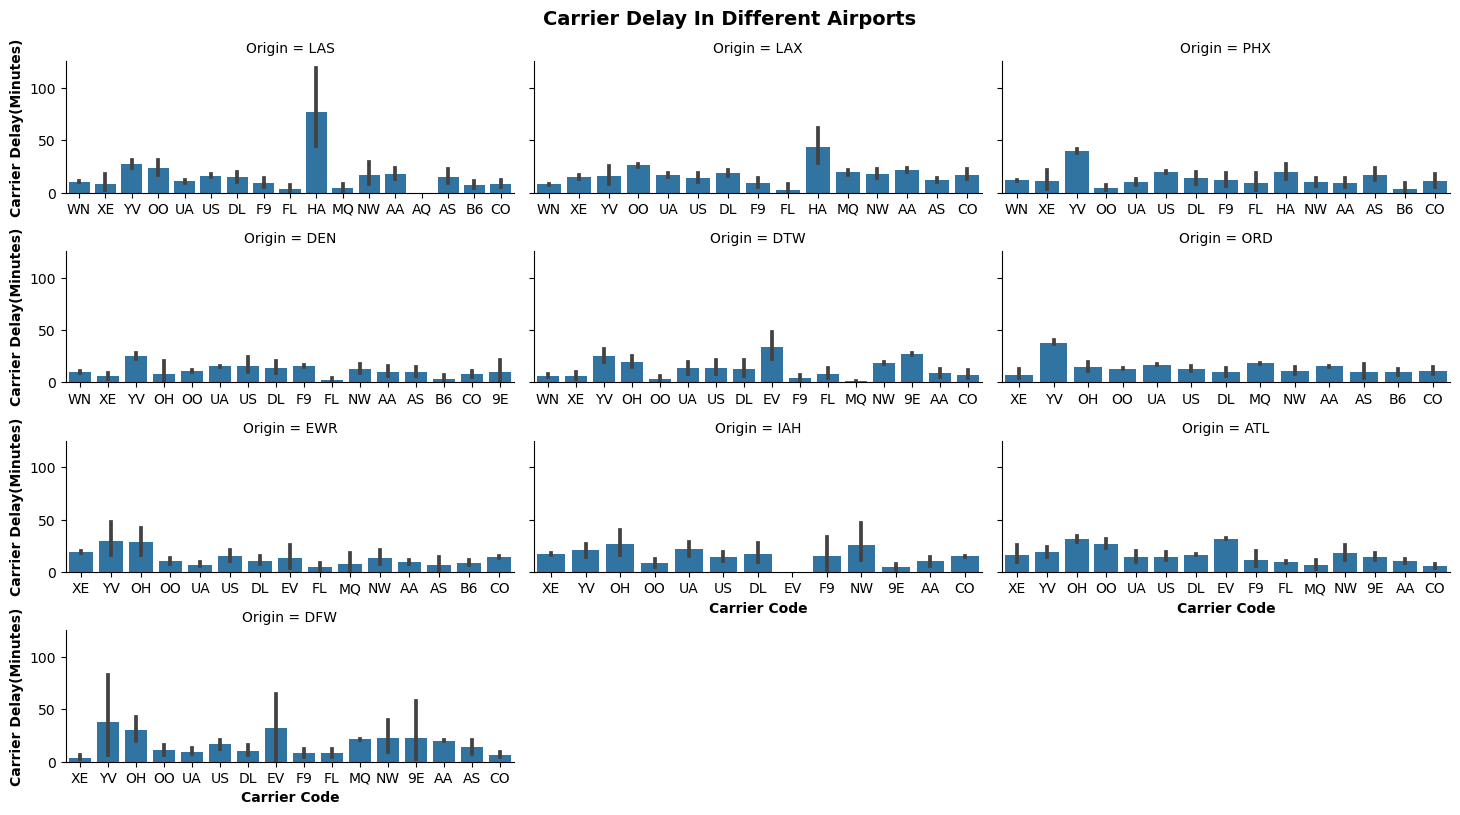

In [5]:
top10_ind = df.Origin.value_counts().head(10).index
top10 = df.loc[df.Origin.isin(top10_ind)]
g = sb.FacetGrid(data=top10, col="Origin", col_wrap=3, margin_titles=True, height=(8.27/4), 
                 aspect=(14.70/3)/(8.27/4), sharex=False)
g.map(sb.barplot, "UniqueCarrier", "CarrierDelay")
ylabels = []
for i in [0,3,6,9]:
    ylables = ylabels.append(g.axes.flat[i])
for ax in ylabels:
    ax.set_ylabel("Carrier Delay(minutes)".title(),
               fontsize = 10, weight = "bold")
g.axes[7].set_xlabel("Carrier Code".title(),
               fontsize = 10, weight = "bold")
g.axes[8].set_xlabel("Carrier Code".title(),
               fontsize = 10, weight = "bold")    
g.axes[9].set_xlabel("Carrier Code".title(),
               fontsize = 10, weight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Carrier Delay in Different Airports".title(),
               fontsize = 14, weight = "bold")
plt.tight_layout();

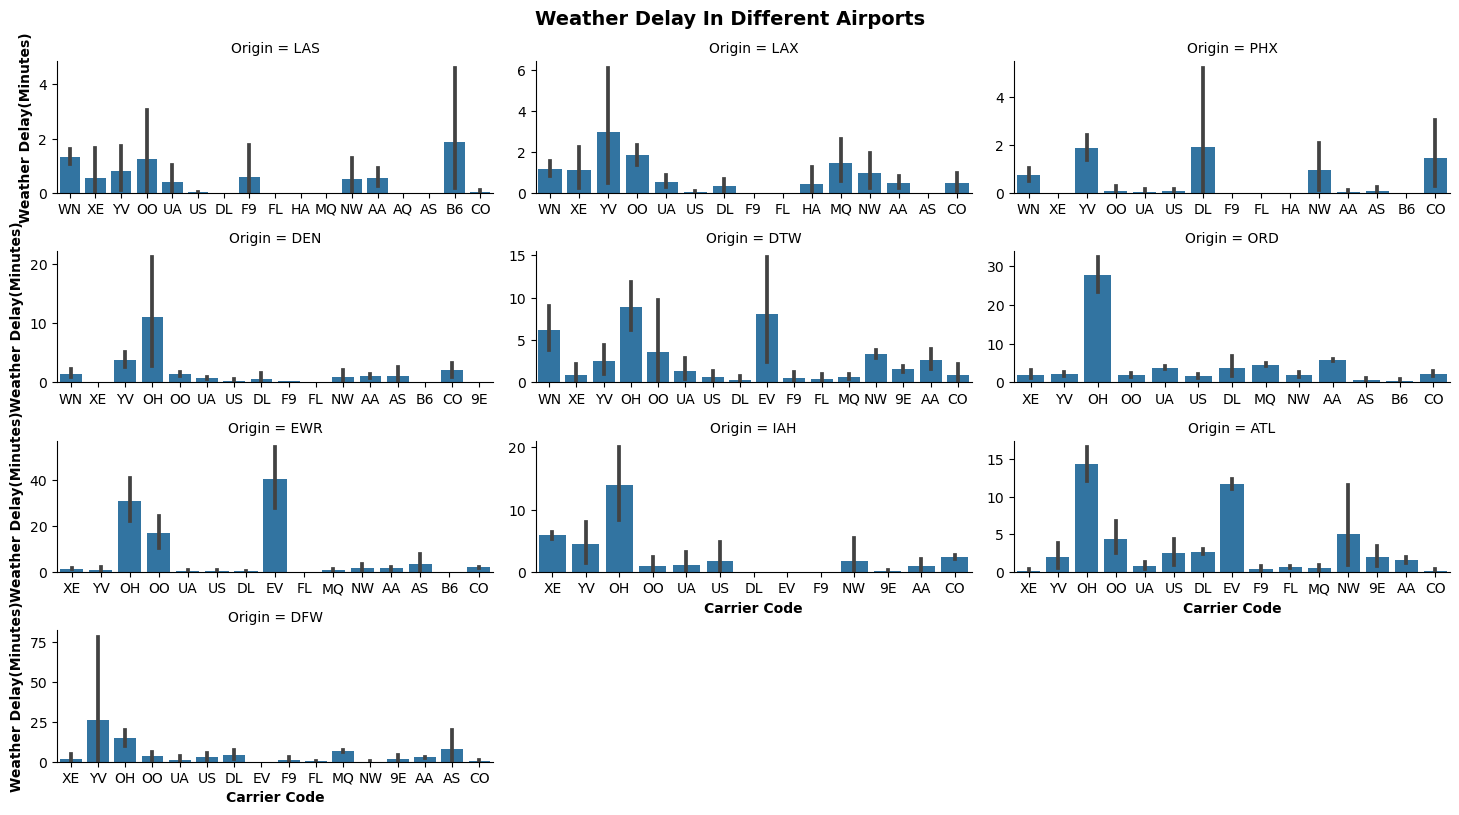

In [6]:
g = sb.FacetGrid(data=top10, col="Origin", col_wrap=3, margin_titles=True, height=(8.27/4), aspect=(14.70/3)/(8.27/4), sharex=False, sharey=False)
g.map(sb.barplot, "UniqueCarrier", "WeatherDelay")
ylabels = []
for i in [0,3,6,9]:
    ylables = ylabels.append(g.axes.flat[i])
for ax in ylabels:
    ax.set_ylabel("Weather Delay(minutes)".title(),
               fontsize = 10, weight = "bold")
g.axes[7].set_xlabel("Carrier Code".title(),
               fontsize = 10, weight = "bold")
g.axes[8].set_xlabel("Carrier Code".title(),
               fontsize = 10, weight = "bold")
g.axes[9].set_xlabel("Carrier Code".title(),
               fontsize = 10, weight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Weather Delay in Different Airports".title(),
               fontsize = 14, weight = "bold")
plt.tight_layout();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 